In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Creating Symbolic Link
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
%cd /mydrive/arial_airport_object_detection/

/content/gdrive/My Drive/arial_airport_object_detection


In [4]:
#Installing Ultralytics
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 26.0 MB/s eta 0:00:00


In [5]:
# Import Libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import PIL
from IPython.display import Image
import numpy as np
import glob

In [6]:
# Training
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 optimizer=Adam imgsz=600 lr0=0.005

100% 21.5M/21.5M [00:00<00:00, 154MB/s]
Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

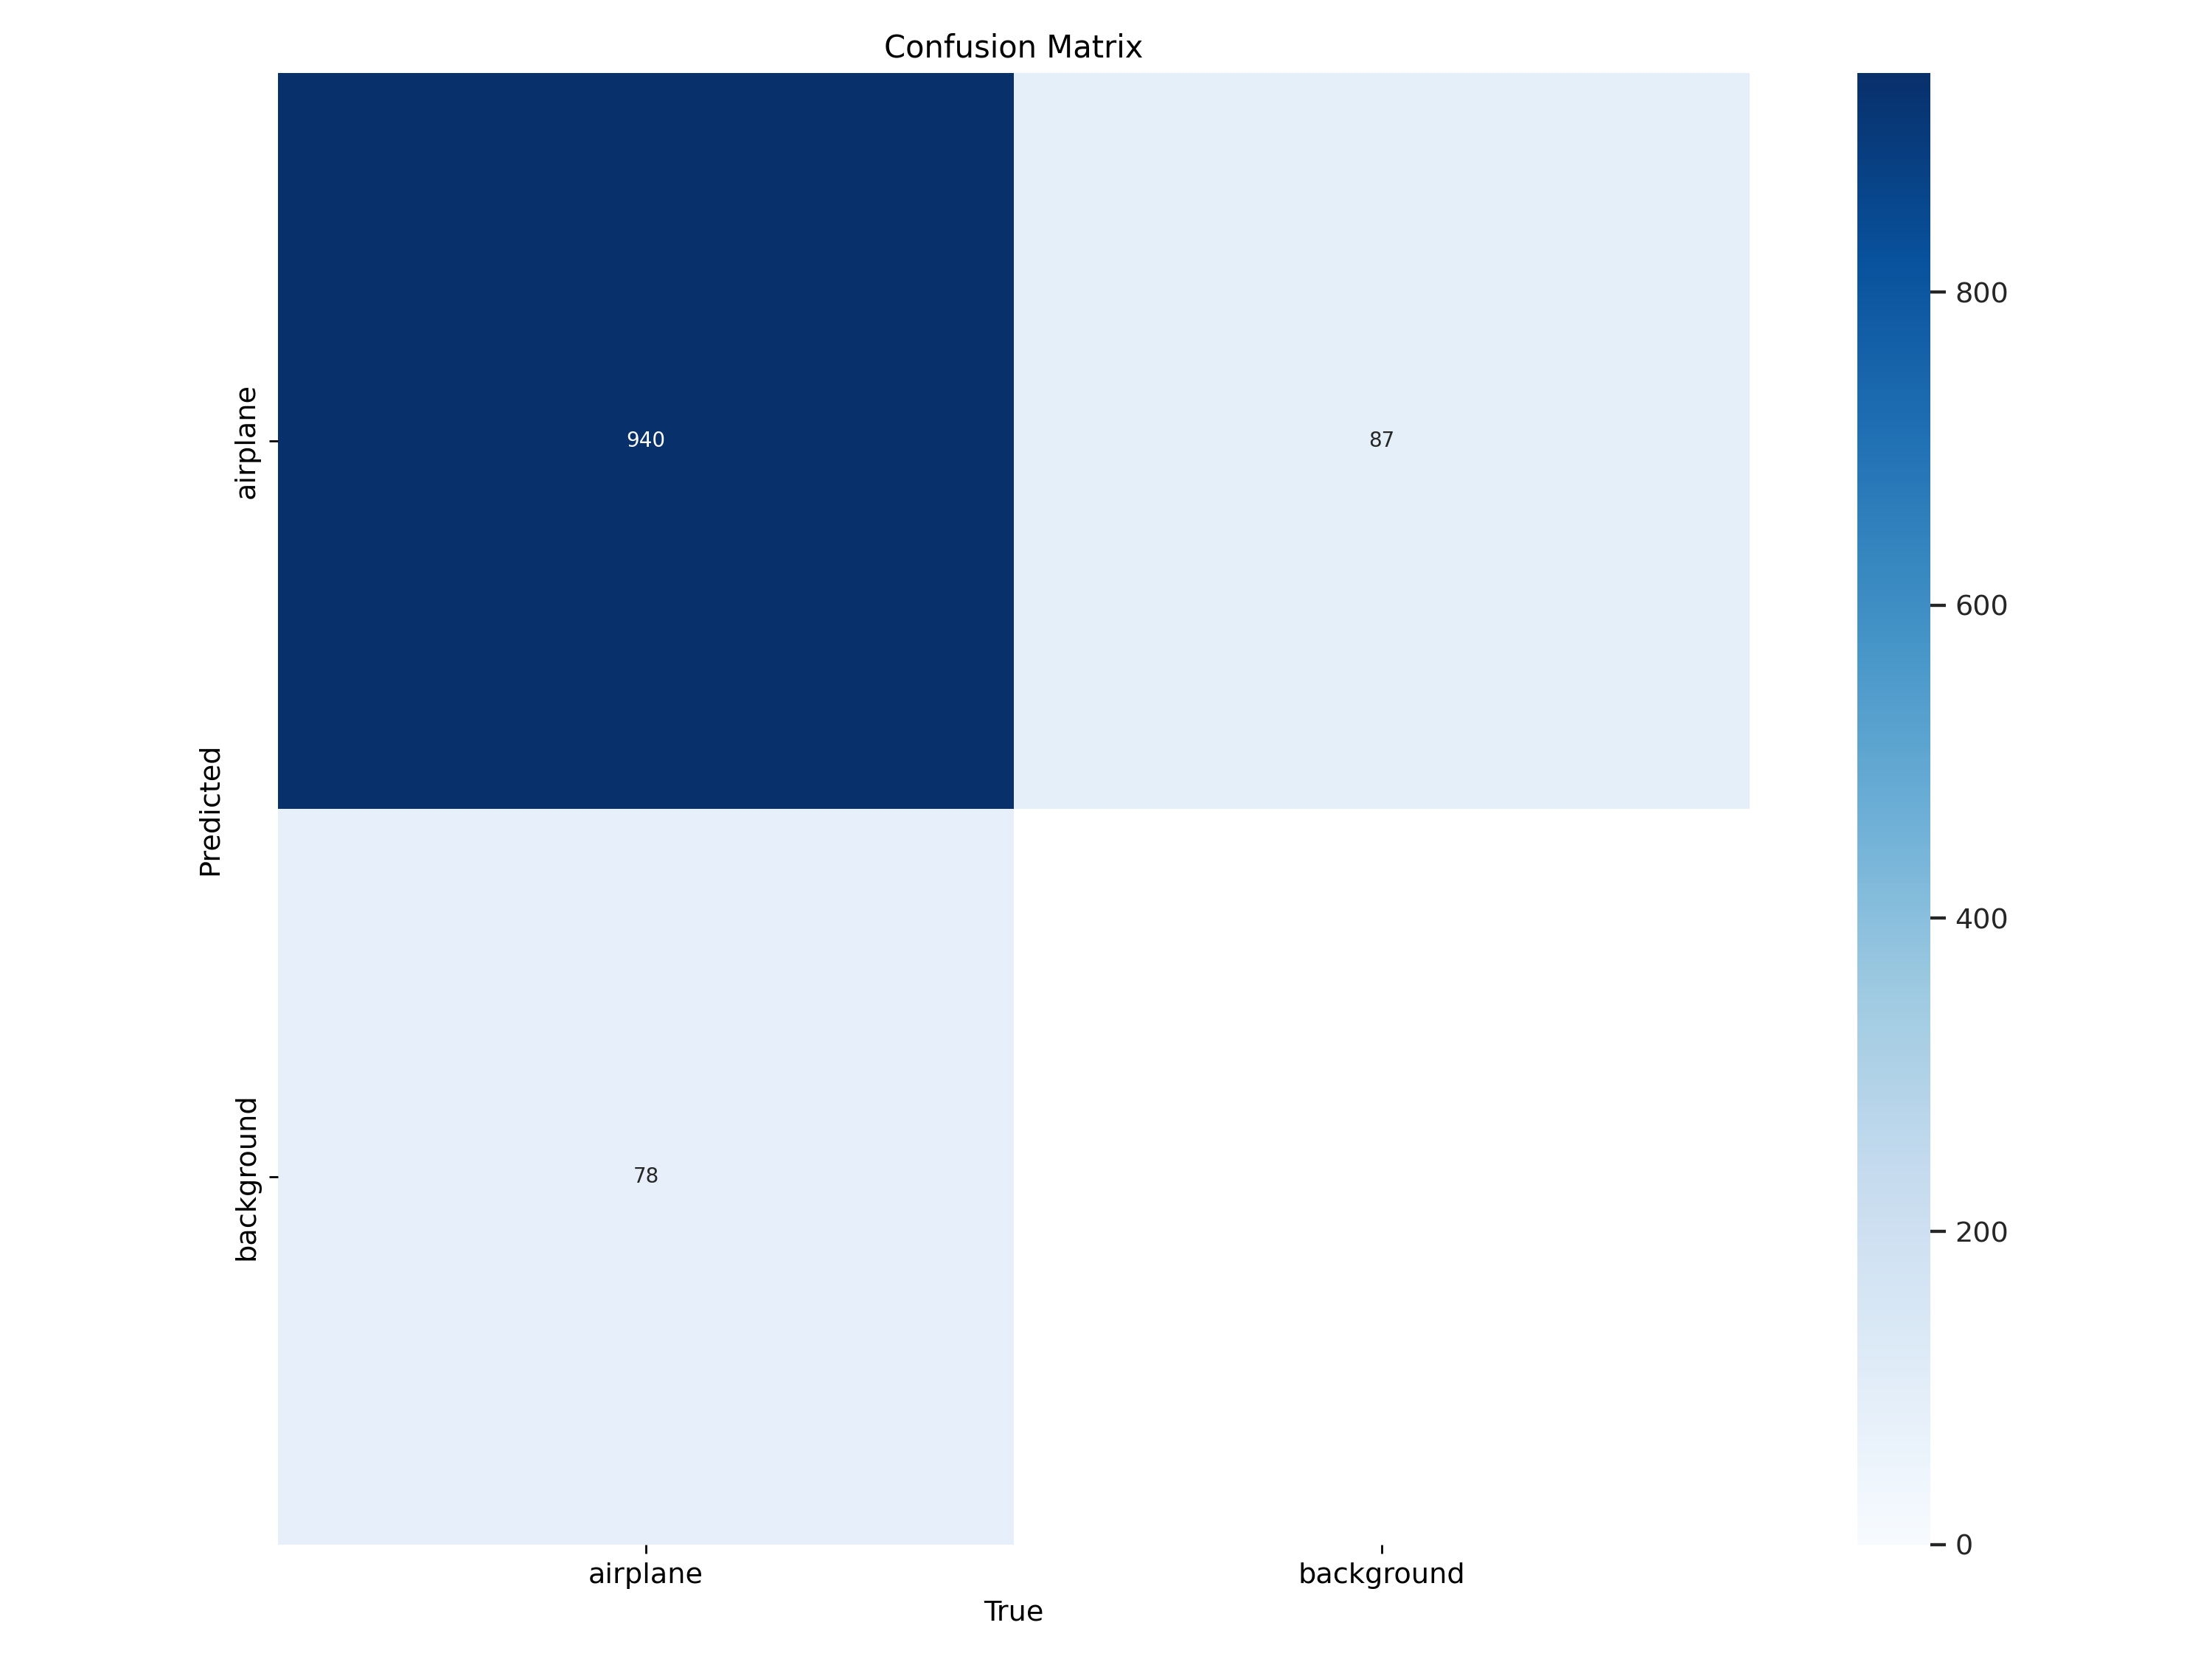

In [7]:
# Displaying the confusion matrix
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

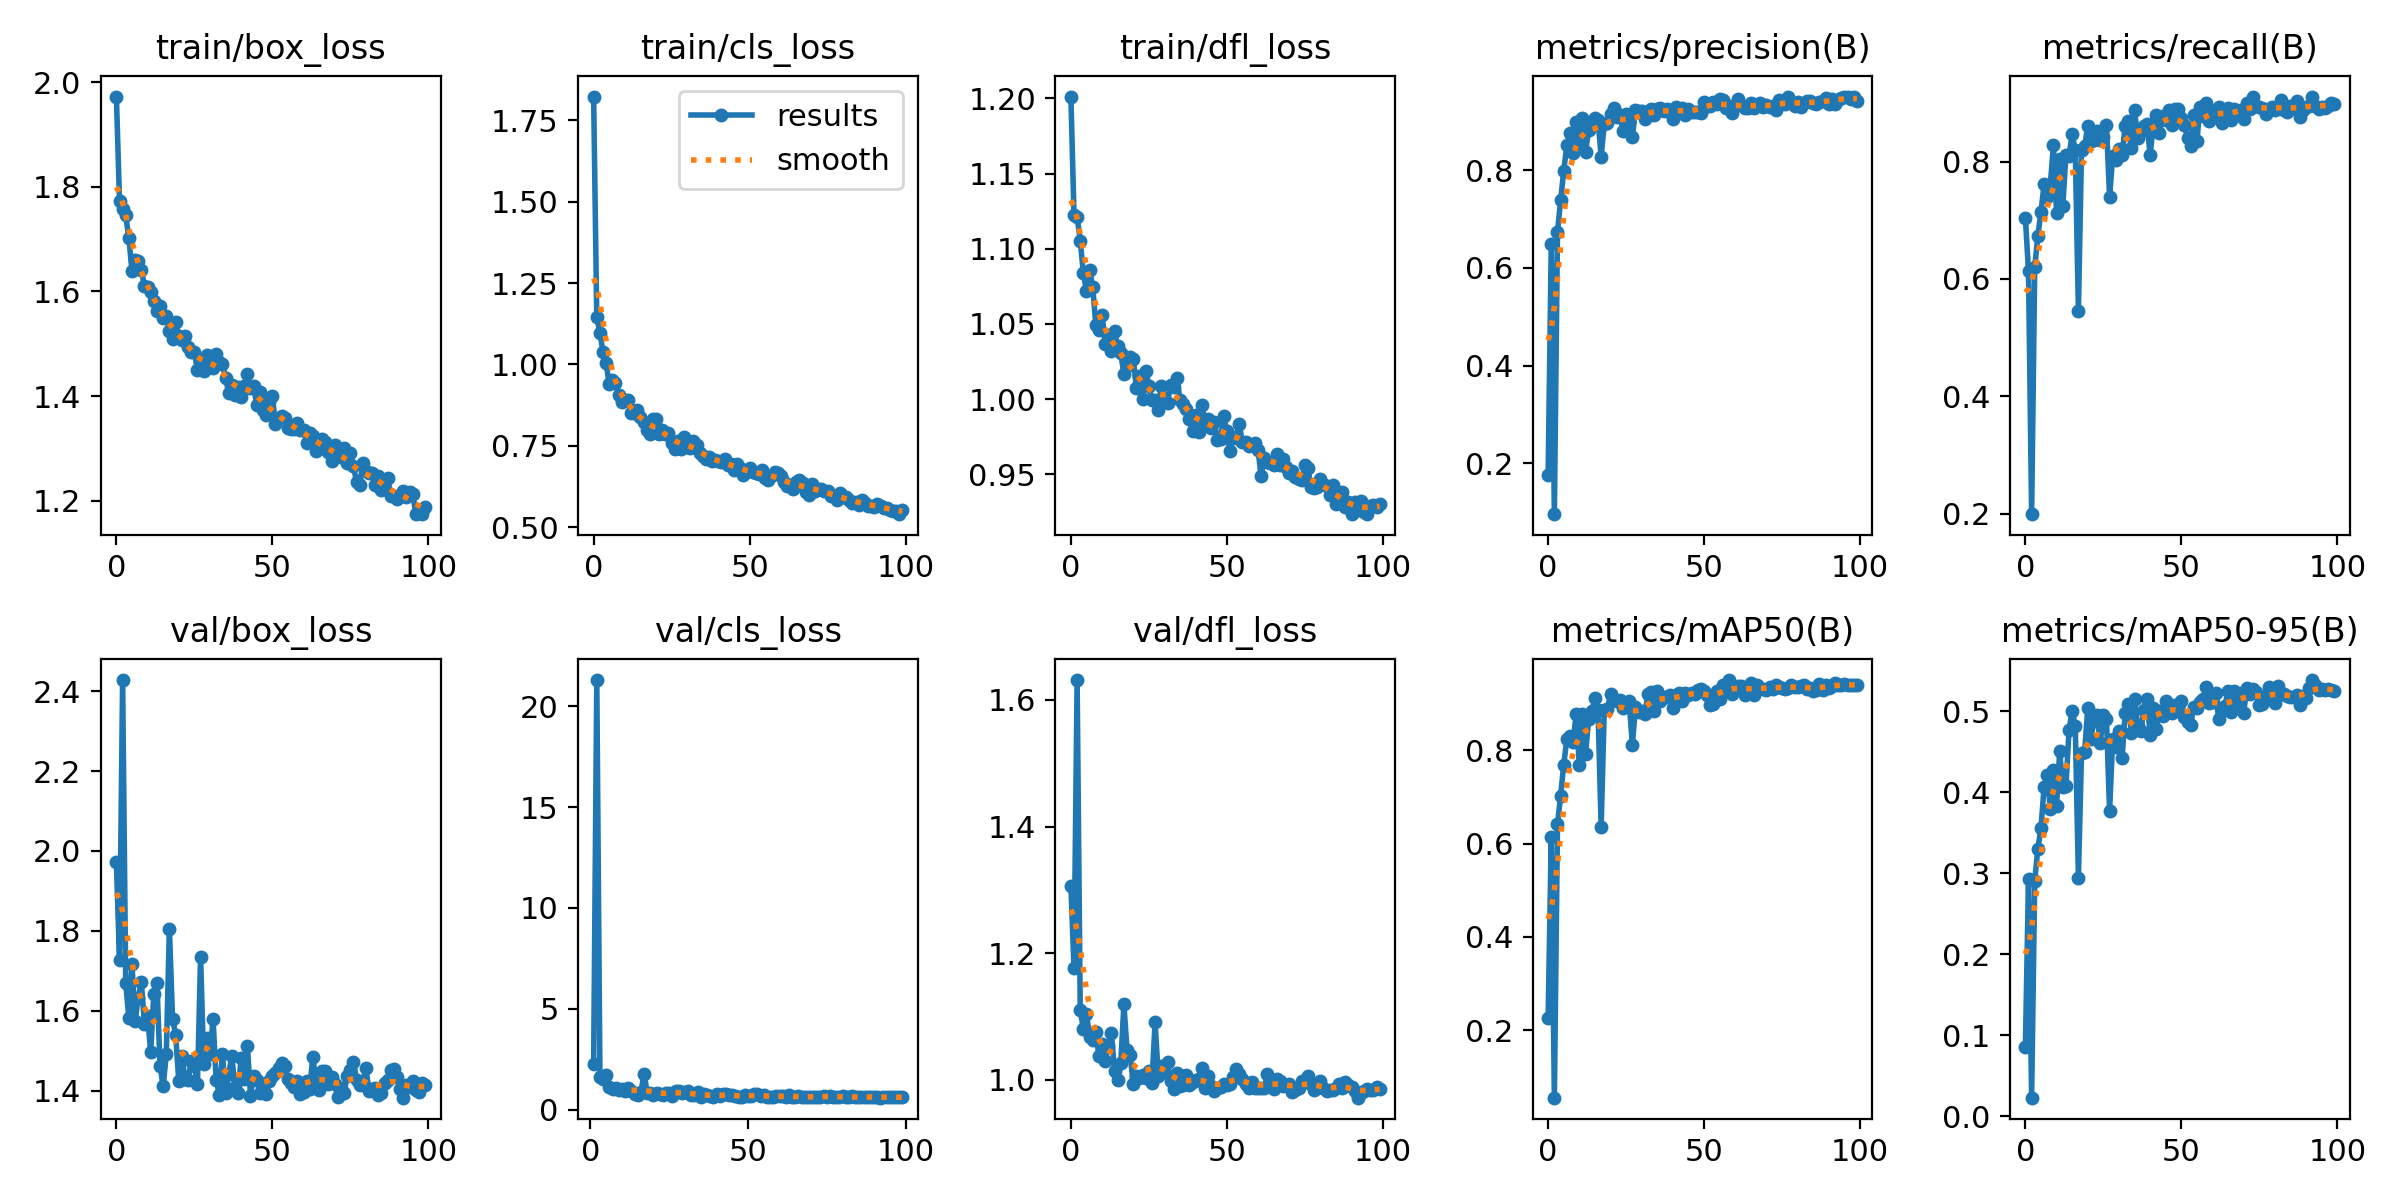

In [8]:
# Displaying model evaluation results
Image(filename='runs/detect/train/results.png', width=600)

In [9]:
# Testing
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=test_data.yaml

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/gdrive/My Drive/arial_airport_object_detection/test/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:06<00:00,  2.26s/it]
                   all         34        497      0.942      0.876      0.946      0.532
Speed: 2.6ms preprocess, 26.5ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val


In [10]:
# Inference
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images 

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/34 /content/gdrive/My Drive/arial_airport_object_detection/test/images/airport_100_jpg.rf.f764c95324c38a84bc2af17b1243f913.jpg: 608x608 35 airplanes, 16.6ms
image 2/34 /content/gdrive/My Drive/arial_airport_object_detection/test/images/airport_104_jpg.rf.9ab0c64ca392b7f6d0b1fe5dc12b2a8c.jpg: 608x608 18 airplanes, 15.9ms
image 3/34 /content/gdrive/My Drive/arial_airport_object_detection/test/images/airport_110_jpg.rf.fa9e3404321d04de0f9318c996d2796c.jpg: 608x608 23 airplanes, 15.9ms
image 4/34 /content/gdrive/My Drive/arial_airport_object_detection/test/images/airport_118_jpg.rf.4254cd74c3e555998d50a2982c1263c2.jpg: 608x608 24 airplanes, 15.9ms
image 5/34 /content/gdrive/My Drive/arial_airport_object_detection/test/images/airport_132_jpg.rf.6faa08a244f3677188a72718cc2d1849.jpg: 608x608 6 airplanes, 15.9ms
image 6/34 /content

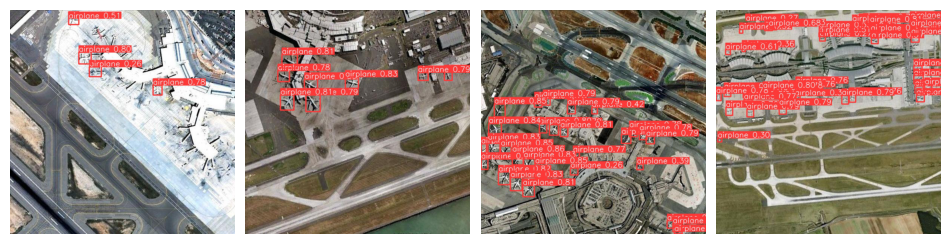

In [11]:
# Displaying the results of inference on the images

image_paths = glob.glob('runs/detect/predict/*.jpg')[10:14]
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for i, image_path in enumerate(image_paths):
    img = PIL.Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()